# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

# Importing the dataset

In [2]:
data = pd.read_csv("weatherAUS.csv")

# Analyze the data

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.shape

(145460, 23)

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
#target count

data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

# Visualization

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-10-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-c4d51ae7f98d>:

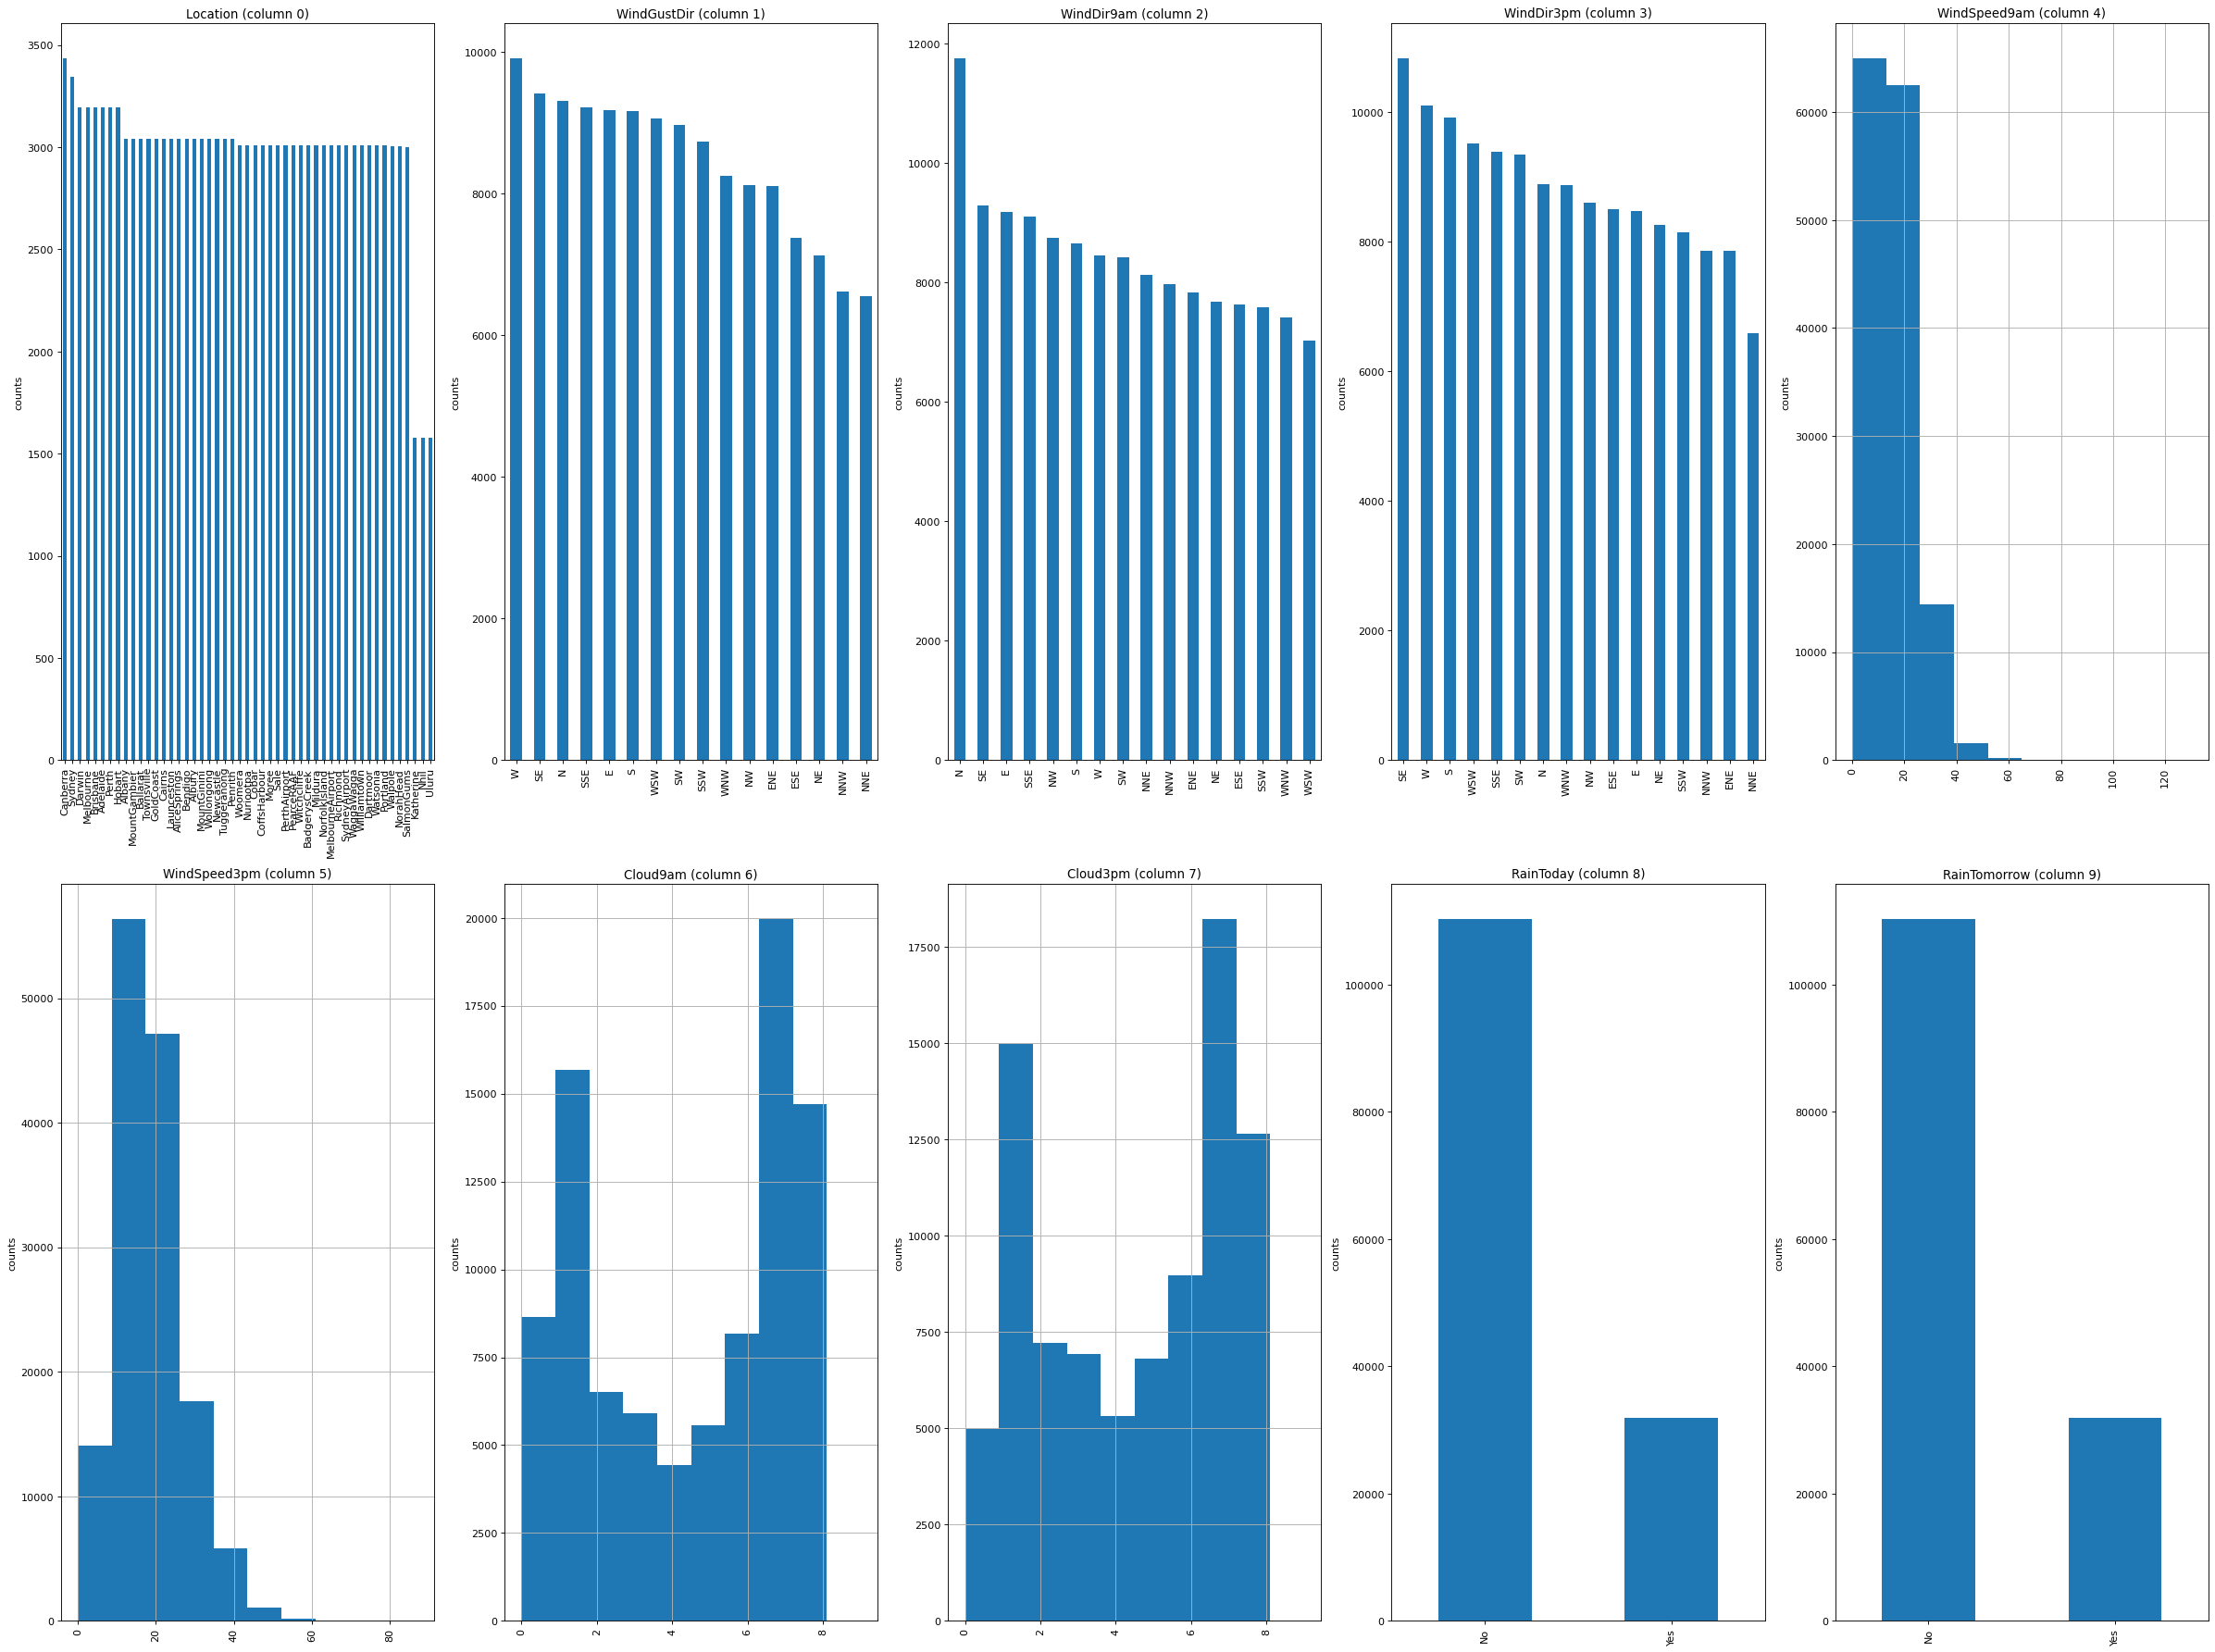

In [11]:
plotPerColumnDistribution(data, 10, 5)

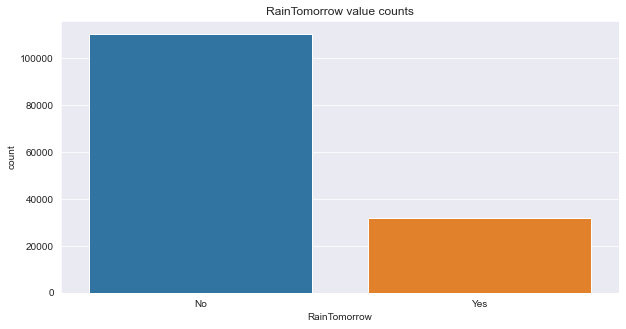

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

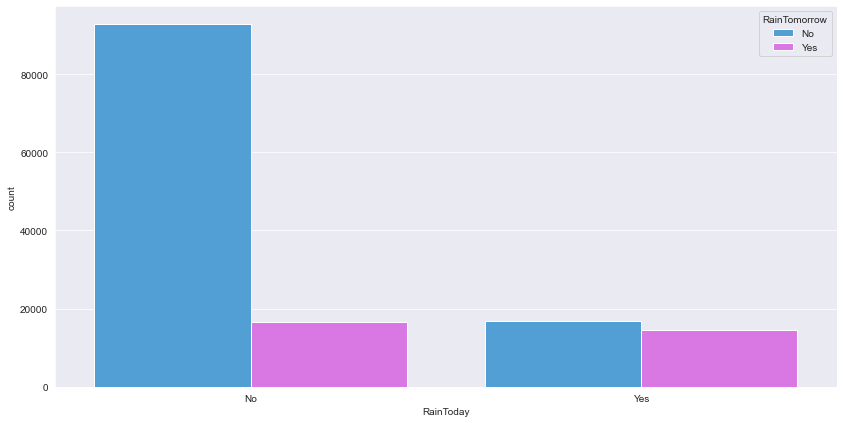

In [13]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

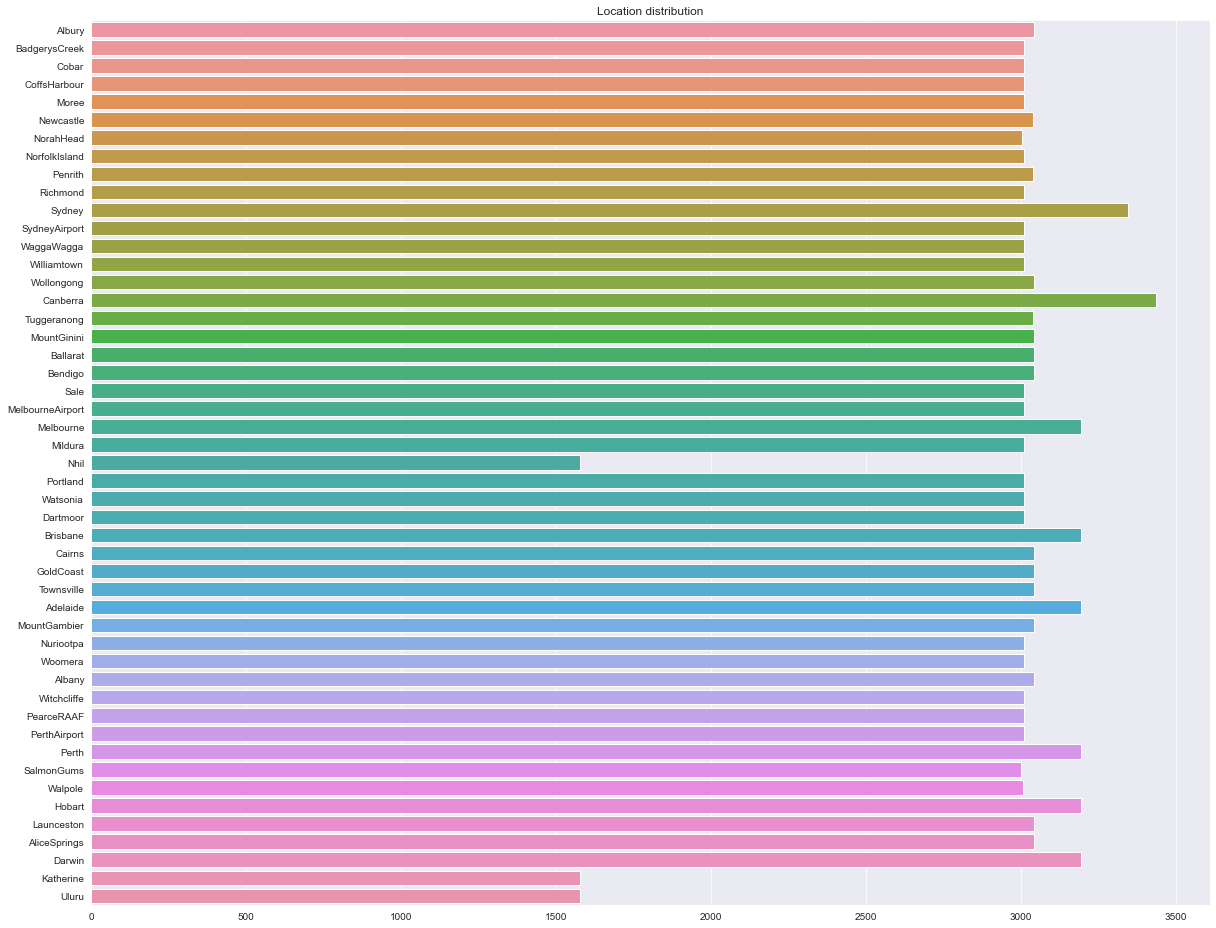

In [14]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

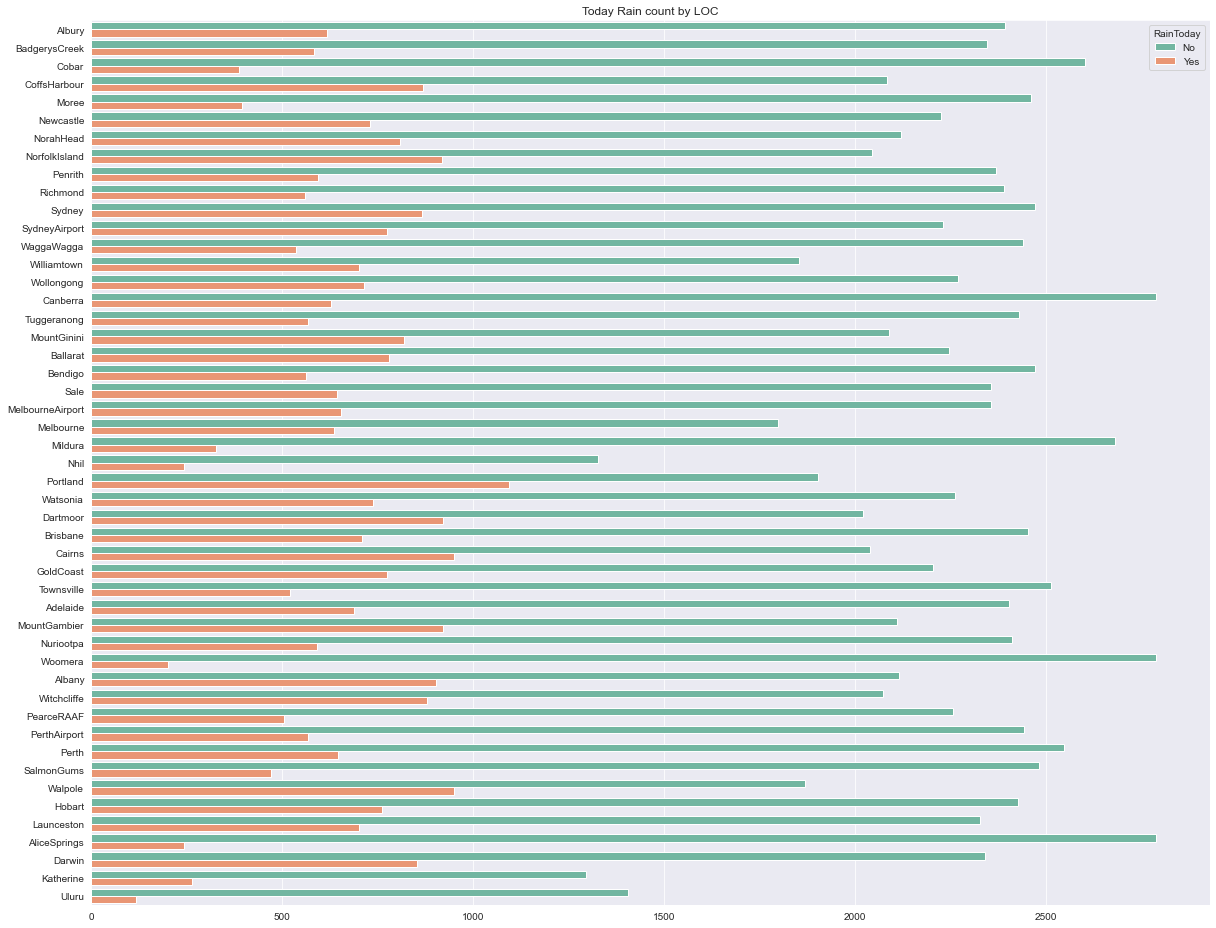

In [15]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

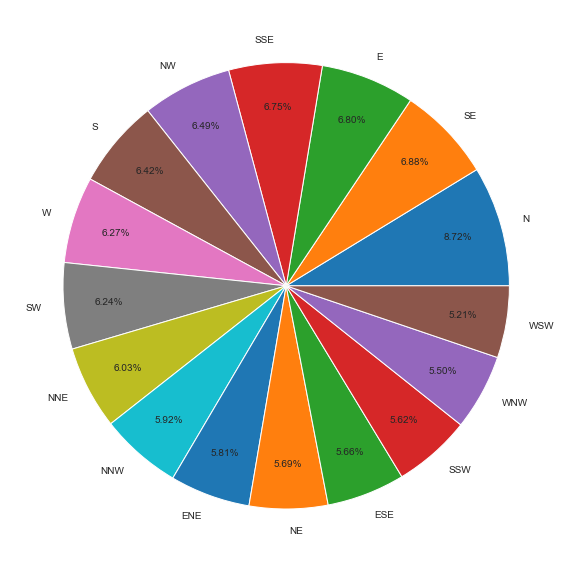

In [16]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

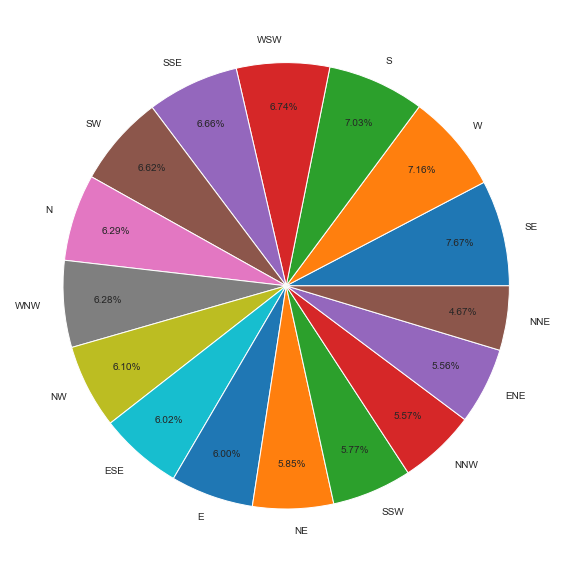

In [17]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

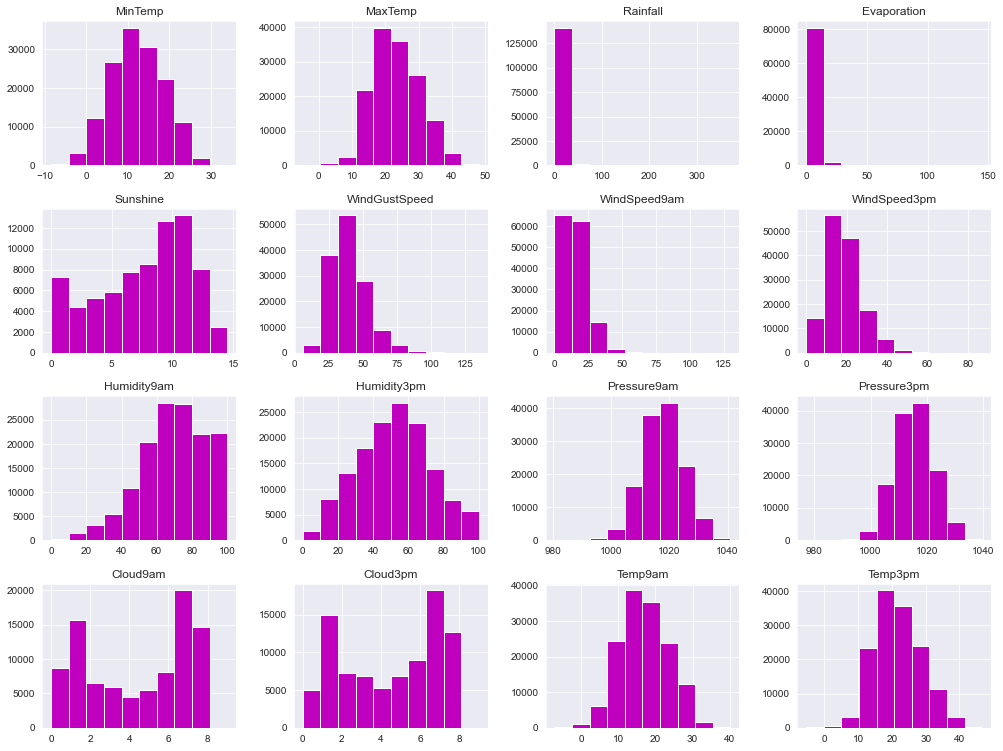

In [18]:
data.hist(figsize=(17,13), color="m");

# Preprocessing

In [20]:
df_preprocessed = data.copy()

In [21]:
df_preprocessed.isnull().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [22]:
mean = df_preprocessed.mean()
df_preprocessed.fillna(mean, inplace=True)

df_preprocessed.isna().sum()

<ipython-input-22-1af03b779413>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_preprocessed.mean()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [23]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [25]:
df_preprocessed['Date'] = pd.to_datetime(df_preprocessed['Date'])

In [26]:
#columns segregation
date_columns = ['Date']
cat_columns = df_preprocessed.select_dtypes(include=['object']).columns
num_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

Encoding categorical variables

In [27]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [28]:
cat_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [29]:
for i in cat_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(df_preprocessed[i].unique()))
    print('-----------------------------------------------------')

Unique Values in Location Column: 49
-----------------------------------------------------
Unique Values in WindGustDir Column: 17
-----------------------------------------------------
Unique Values in WindDir9am Column: 17
-----------------------------------------------------
Unique Values in WindDir3pm Column: 17
-----------------------------------------------------
Unique Values in RainToday Column: 3
-----------------------------------------------------
Unique Values in RainTomorrow Column: 3
-----------------------------------------------------


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df_preprocessed[i] = le.fit_transform(df_preprocessed[i])
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [31]:
df_preprocessed[['RainToday']].value_counts()

RainToday
No           110319
Yes           31880
NaN            3261
dtype: int64

In [32]:
df_preprocessed[['RainTomorrow']].value_counts()

RainTomorrow
No              110316
Yes              31877
NaN               3267
dtype: int64

In [33]:
df_preprocessed[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [34]:
dataframe = df_preprocessed[(df_preprocessed != "NaN").all(axis=1)]
del df_preprocessed

In [35]:
dataframe['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [36]:
label_dict = {'No': 0,'Yes':1}
dataframe['RainTomorrow'] = dataframe['RainTomorrow'].map(label_dict)
dataframe['RainToday'] = dataframe['RainToday'].map(label_dict)

In [37]:
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [38]:
# removing Date Column
dataframe.drop(['Date'], axis=1, inplace=True)

In [39]:
dataframe.reset_index(drop=True, inplace=True)

In [40]:
## train test split

from sklearn.model_selection import train_test_split

X = dataframe.drop(columns=["RainTomorrow"])
y = dataframe["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled.shape

(98550, 21)

In [43]:
X_train_scaled[0,:]

array([3.54166667e-01, 5.21226415e-01, 5.19157088e-01, 5.39083558e-04,
       3.77119415e-02, 5.24908795e-01, 1.25000000e-01, 3.25581395e-01,
       4.37500000e-01, 4.37500000e-01, 1.53846154e-02, 1.32530120e-01,
       6.96969697e-01, 6.80000000e-01, 3.20338983e-01, 3.19218241e-01,
       4.94162362e-01, 5.01103343e-01, 5.47413793e-01, 5.19305019e-01,
       0.00000000e+00])

# Training and testing the model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.svm import SVC

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
#Models initialization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = RandomForestClassifier()
svm = SVC()
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier()
log = LogisticRegression()

Fitting the model

In [65]:
XGBoost.fit(X_train,y_train)
Rand_forest.fit(X_train,y_train)
svm.fit(X_train,y_train)
Dtree.fit(X_train,y_train)
GBM.fit(X_train,y_train)
log.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting the Train values

In [66]:
p1 = XGBoost.predict(X_train)
p2 = Rand_forest.predict(X_train)
p3 = svm.predict(X_train)
p4 = Dtree.predict(X_train)
p5 = GBM.predict(X_train)
p6 = log.predict(X_train)

Checking the Accuracy Score

In [67]:
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

xgboost: 0.8483409436834094
Rand_forest: 0.9999594114662608
svm: 0.838132927447996
Dtree: 0.9999695585996956
GBM 0.8552409944190766
log: 0.8409233891425673


# Model Evaluation

# 1.Accuracy

In [69]:
t1 = XGBoost.predict(X_test)
t2 = Rand_forest.predict(X_test)
t3 = svm.predict(X_test)
t4 = Dtree.predict(X_test)
t5 = GBM.predict(X_test)
t6 = log.predict(X_test)

In [70]:
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
print("svm:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.8421999668537065
Rand_forest: 0.8569263915524303
svm: 0.8357601155385089
Dtree: 0.7901129341572555
GBM 0.8492790681156333
log: 0.83924047635959


# 2.Confusion Matrix

# XGBoost confusion matrix

In [72]:
conf_matrix = metrics.confusion_matrix(y_test,t1)

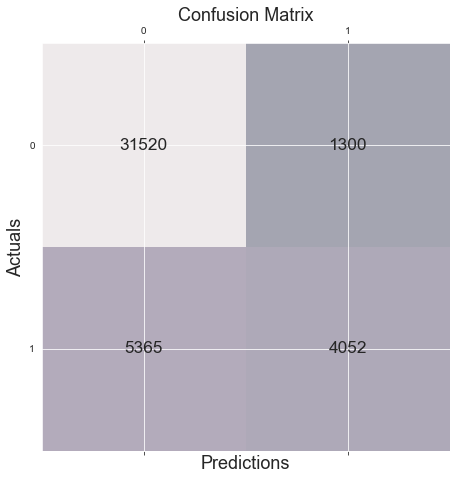

In [73]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [82]:
print(conf_matrix)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)
print("F1-score:",f1_score)

[[31520  1300]
 [ 5365  4052]]
Accuracy: <function accuracy_score at 0x000001A0D944C430>
Precision: <function precision_score at 0x000001A0D9451160>
Recall: <function recall_score at 0x000001A0D9451280>
F1-score: <function f1_score at 0x000001A0D944CC10>


# Random forest Confusion matrix

In [83]:
r_conf_matrix = metrics.confusion_matrix(y_test,t2)

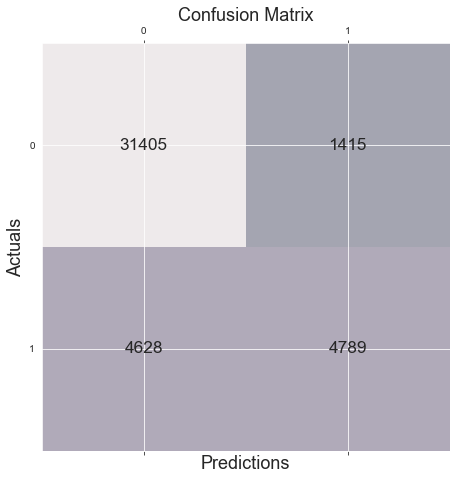

In [88]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(r_conf_matrix,alpha=0.3)
for i in range(r_conf_matrix.shape[0]):
  for j in range(r_conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=r_conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

# SVM Confusion matrix

In [84]:
s_conf_matrix = metrics.confusion_matrix(y_test,t3)

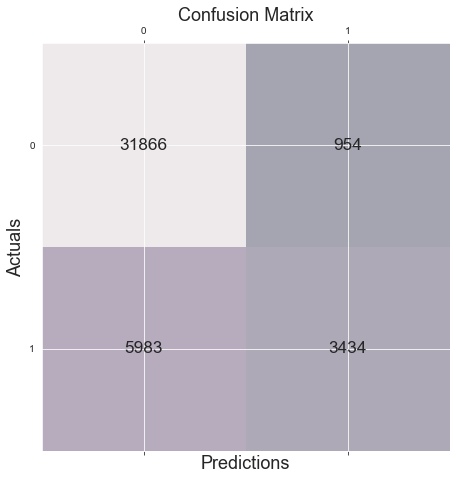

In [89]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(s_conf_matrix,alpha=0.3)
for i in range(s_conf_matrix.shape[0]):
  for j in range(s_conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=s_conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

# Decision tree Confusion matrix

In [85]:
d_conf_matrix = metrics.confusion_matrix(y_test,t4)

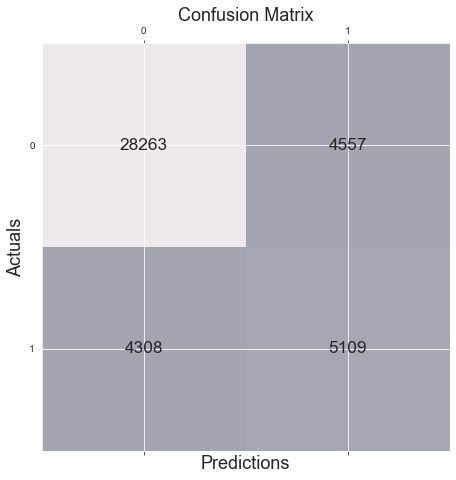

In [90]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(d_conf_matrix,alpha=0.3)
for i in range(d_conf_matrix.shape[0]):
  for j in range(d_conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=d_conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

# GBM Confusion matrix

In [86]:
g_conf_matrix = metrics.confusion_matrix(y_test,t5)

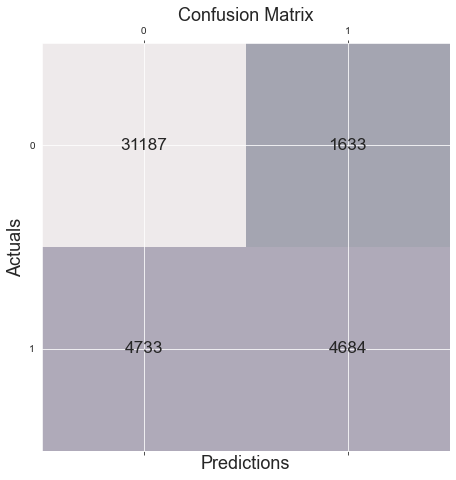

In [91]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(g_conf_matrix,alpha=0.3)
for i in range(g_conf_matrix.shape[0]):
  for j in range(g_conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=g_conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

# Logistic Regression Confusion matrix

In [87]:
l_conf_matrix = metrics.confusion_matrix(y_test,t6)

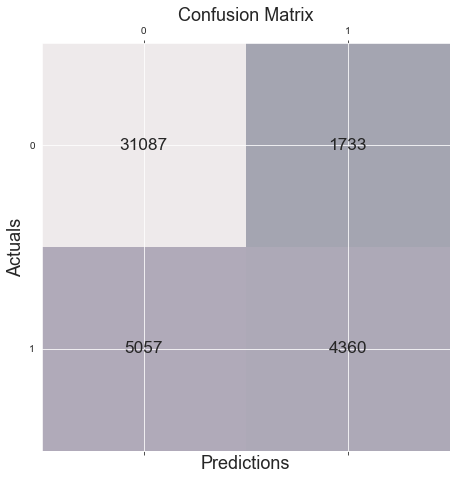

In [92]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(l_conf_matrix,alpha=0.3)
for i in range(l_conf_matrix.shape[0]):
  for j in range(l_conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=l_conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

# 3.ROC AUC SCORE

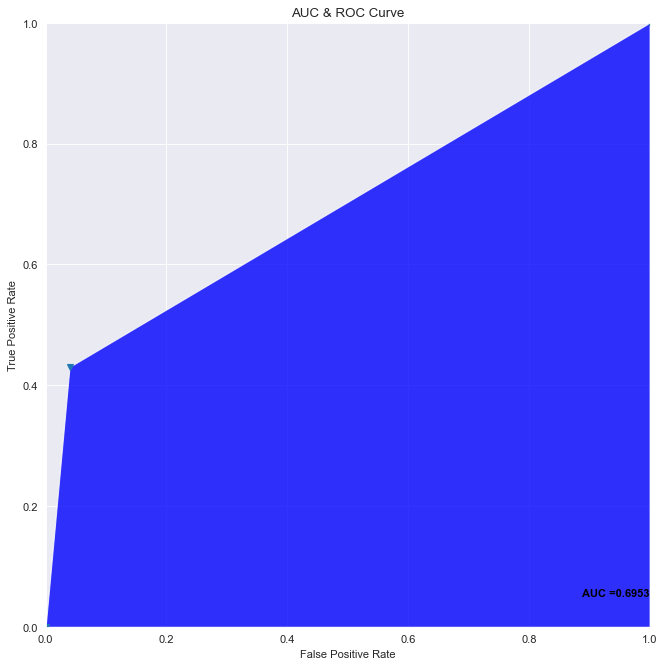

In [97]:
auc = metrics.roc_auc_score(y_test,t1)

fpr,tpr,thresholds = metrics.roc_curve(y_test,t1)

plt.figure(figsize = (12,10),dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr,'v')
plt.fill_between(fpr,tpr,facecolor = 'blue',alpha=0.8)
plt.text(1,0.05, 'AUC =%0.4f' % auc, ha='right', fontsize =10, weight ='bold' , color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()